<a href="https://colab.research.google.com/github/MphoPetunia/Strudent_Feedbck_System/blob/main/Student_FeedBack_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Student': ['Tim', 'Sarah', 'David', 'Eve', 'Alice'], 'Course':['Math', 'Science', 'Business Studies', 'English', 'Arts'], 'Rating':[5 ,4, 3, 5, 4],'Comments':['Great Course', 'Well-Structured','Too-Fast','Love it', 'Informative']}
df = pd.DataFrame(data)
print(df)

  Student            Course  Rating         Comments
0     Tim              Math       5     Great Course
1   Sarah           Science       4  Well-Structured
2   David  Business Studies       3         Too-Fast
3     Eve           English       5          Love it
4   Alice              Arts       4      Informative


In [ ]:
print('Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Student   5 non-null      object
 1   Course    5 non-null      object
 2   Rating    5 non-null      int64 
 3   Comments  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes
None


In [ ]:
print("\nMissing in Dataset:")
print(df.isnull().sum())


Missing in Dataset:
Student     0
Course      0
Rating      0
Comments    0
dtype: int64


In [ ]:
df = df.dropna()
print("Dataset after removing missing values:")
print(df)

Dataset after removing missing values:
  Student            Course  Rating         Comments
0     Tim              Math       5     Great Course
1   Sarah           Science       4  Well-Structured
2   David  Business Studies       3         Too-Fast
3     Eve           English       5          Love it
4   Alice              Arts       4      Informative


In [ ]:
df['Rating']=df['Rating'].fillna(0)
df['Comments']=df['Comments'].fillna('No Comments')
print(df)

  Student            Course  Rating         Comments
0     Tim              Math       5     Great Course
1   Sarah           Science       4  Well-Structured
2   David  Business Studies       3         Too-Fast
3     Eve           English       5          Love it
4   Alice              Arts       4      Informative


In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
print("\nData Types After Conversion:")

print(df.dtypes)


Data Types After Conversion:
Student     object
Course      object
Rating       int64
Comments    object
dtype: object


In [ ]:
#Analyzing average ratings by course
average_ratings = df.groupby('Course')['Rating'].mean().reset_index()
print("Average Ratings by course:")
print(average_ratings)

Average Ratings by course:
             Course  Rating
0              Arts     4.0
1  Business Studies     3.0
2           English     5.0
3              Math     5.0
4           Science     4.0


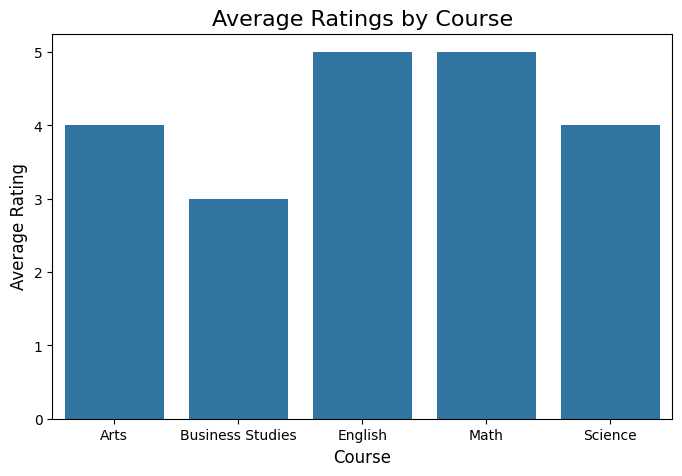

In [ ]:
#Visualiazing ratings with a bar chart
# Bar chart for average ratings
plt.figure(figsize=(8, 5))
sns.barplot(data=average_ratings, x='Course', y='Rating')

# Add labels and title
plt.title('Average Ratings by Course', fontsize=16)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()


In [ ]:
#Extracting  Feedback comments for each Course
course_comments = df.groupby('Course')['Comments'].apply(list).reset_index()
print("Feedback Comments by Course:")
print(course_comments)

Feedback Comments by Course:
             Course           Comments
0              Arts      [Informative]
1  Business Studies         [Too-Fast]
2           English          [Love it]
3              Math     [Great Course]
4           Science  [Well-Structured]


In [ ]:
#Identifying positive and  negative feedback
df['Feedback_Type'] = np.where(df['Rating'] >= 4, 'Positive', 'Negative')
print("Dataset with Feedback Type:")
print(df)

feedback_summary = df['Feedback_Type'].value_counts()
print("\nFeedback Summary:")
print(feedback_summary)

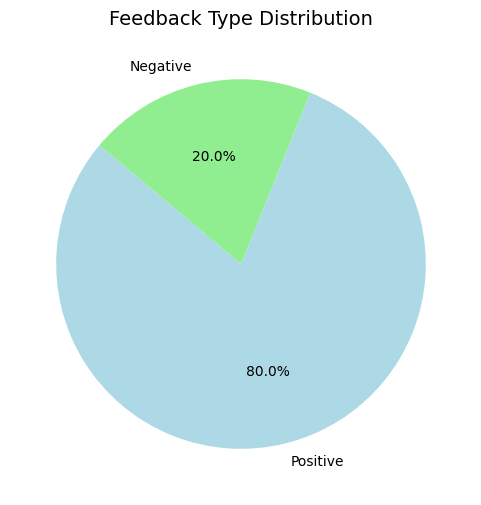

In [ ]:
#Using a pie chart to visualize the feedback types
plt.figure(figsize=(6, 6))
df['Feedback_Type'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen']
)
plt.title('Feedback Type Distribution', fontsize=14)
plt.ylabel('')
plt.show()


Sentiment Analysis on the feedback comments

In [14]:
!pip install nltk


In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Comments' column
df['Sentiment_Score'] = df['Comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the score
# Positive: score > 0.05, Neutral: -0.05 <= score <= 0.05, Negative: score < -0.05
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral')
)

# Display dataset with sentiment analysis
print("Dataset with Sentiment Analysis:")
print(df[['Comments', 'Sentiment_Score', 'Sentiment']])


Dataset with Sentiment Analysis:
          Comments  Sentiment_Score Sentiment
0     Great Course           0.6249  Positive
1  Well-Structured           0.0000   Neutral
2         Too-Fast           0.0000   Neutral
3          Love it           0.6369  Positive
4      Informative           0.0000   Neutral


<ipython-input-21-9cd497a818fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


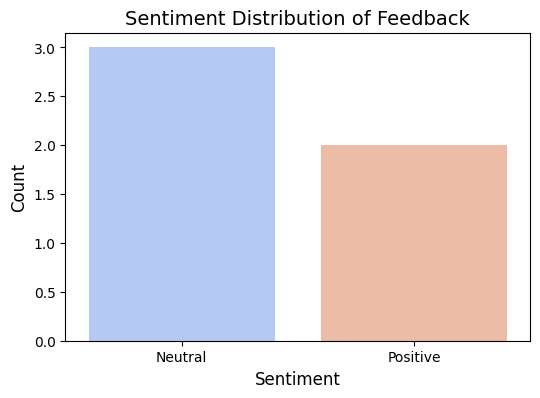

In [21]:
# Count sentiment types
sentiment_counts = df['Sentiment'].value_counts()

# Bar chart for sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')

# Add labels and title
plt.title('Sentiment Distribution of Feedback', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


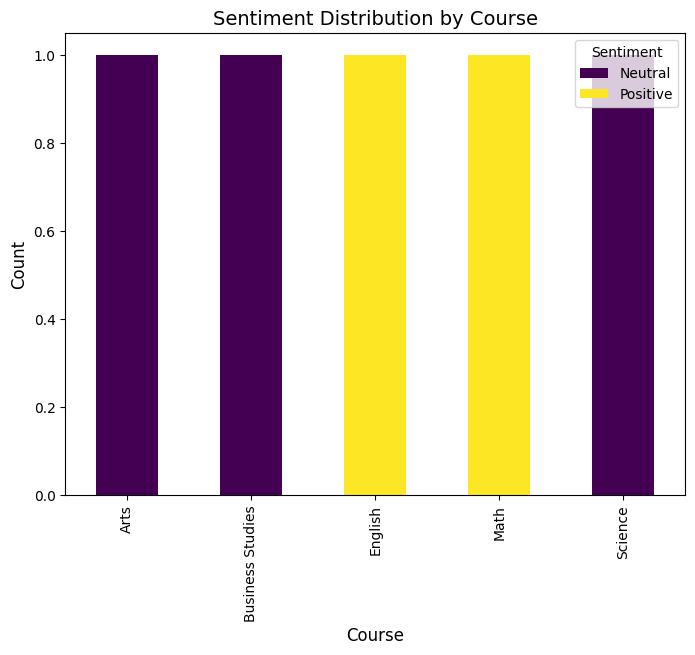

In [22]:
#Sentiment Aanalysis by course
# Grouping sentiment by course
course_sentiment = df.groupby(['Course', 'Sentiment']).size().unstack().fillna(0)

# Stacked bar chart for sentiment distribution by course
course_sentiment.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')


plt.title('Sentiment Distribution by Course', fontsize=14)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title="Sentiment")
plt.show()


In [23]:
# Saving the final dataset as a CSV file
final_csv_filename = 'final_student_feedback.csv'
df.to_csv(final_csv_filename, index=False)

# Downloading the file
from google.colab import files
files.download(final_csv_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>